# Approving Loans based on financial data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
dataset = pd.read_csv('./loan_financial_data/financial_data.csv')

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [35]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [36]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [37]:
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [38]:
dataset2 = dataset.drop(columns=['entry_id','pay_schedule','e_signed'])

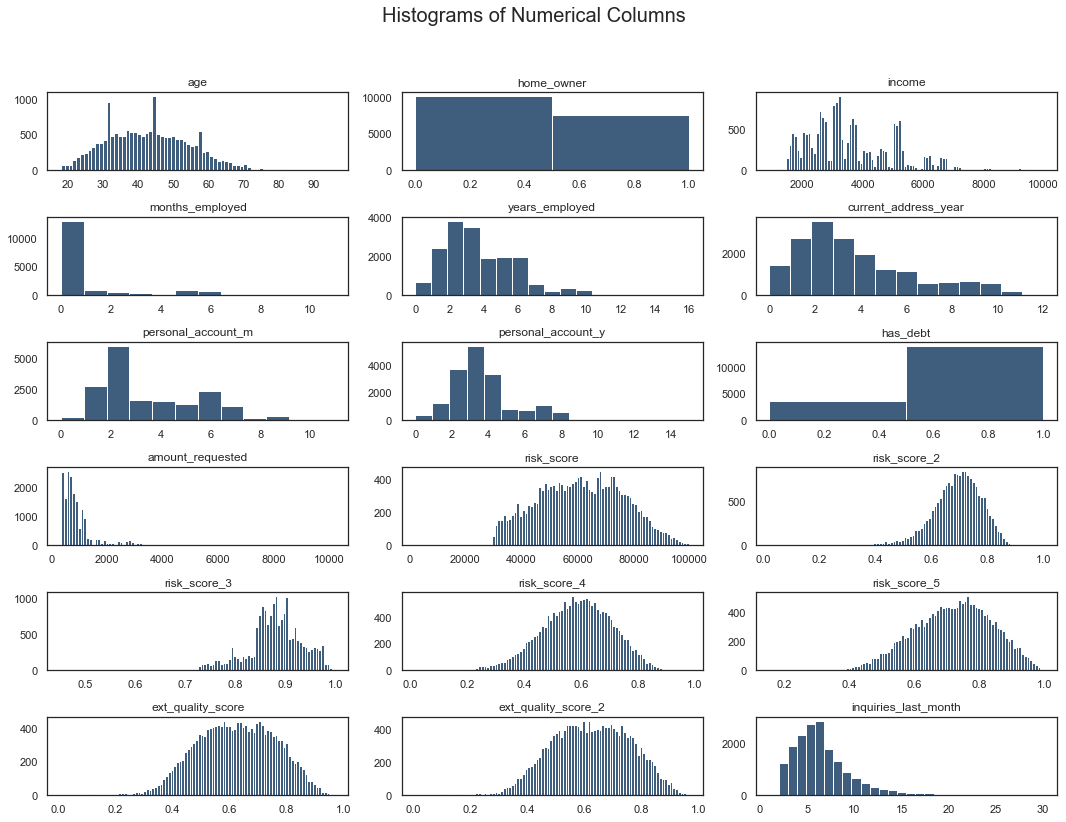

In [39]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)

for i in range(dataset2.shape[1]):
    plt.subplot(6,3,i+1)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    vals=np.size(dataset2.iloc[:,i].unique())
    if vals>=100:
        vals=100
        
    plt.hist(dataset2.iloc[:,i],bins=vals,color='#3F5D7D')
    
plt.tight_layout(rect=[0,0.03,1,0.95])

<AxesSubplot:title={'center':'Correlation with E-Signed'}>

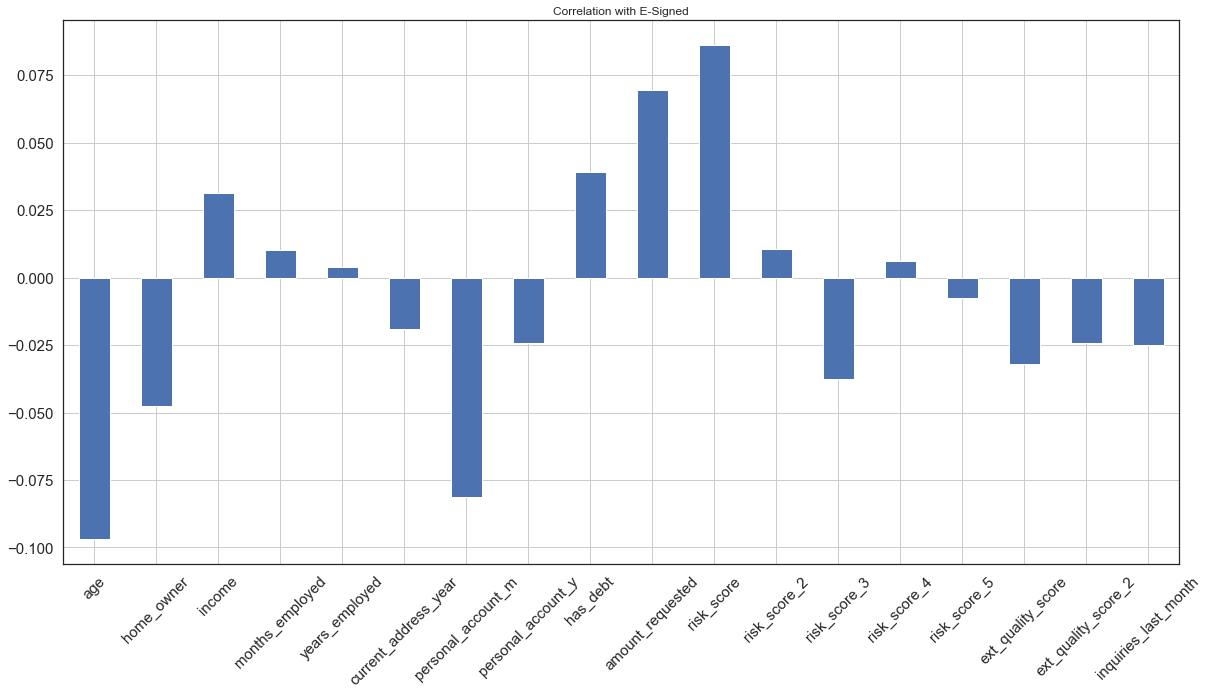

In [40]:
dataset2.corrwith(dataset.e_signed).plot.bar(figsize=(20,10),title='Correlation with E-Signed',fontsize=15,rot=45,grid=True)

<AxesSubplot:>

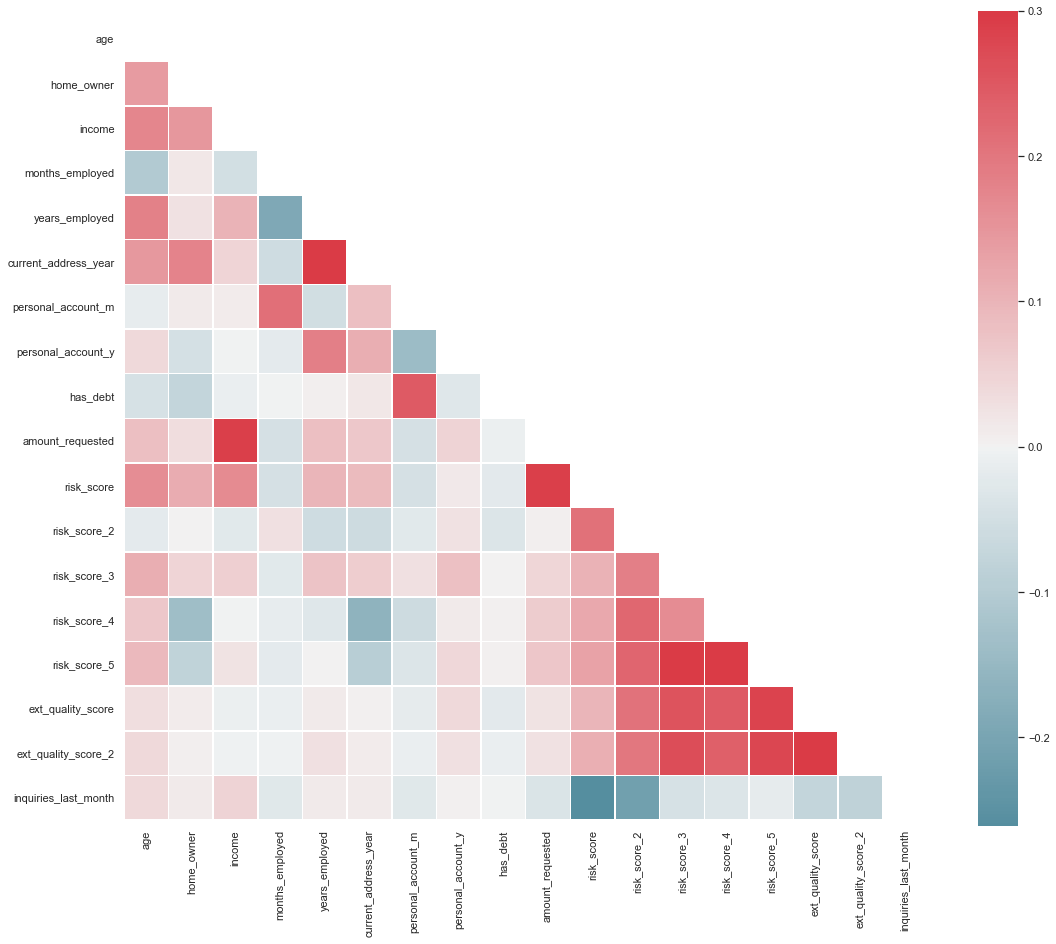

In [41]:
sns.set(style="white")
corr=dataset2.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax=plt.subplots(figsize=(18,15))
cmap=sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5)

In [42]:
import random
import time

In [43]:
random.seed(100)

In [44]:
dataset=dataset.drop(columns=['months_employed'])

In [45]:
dataset['personal_account_months']=(dataset.personal_account_m + dataset.personal_account_y*12)

In [47]:
dataset[['personal_account_m','personal_account_y','personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [48]:
dataset = dataset.drop(columns = ['personal_account_m','personal_account_y'])

In [49]:
dataset=pd.get_dummies(dataset)

In [50]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [51]:
dataset = dataset.drop(columns=['pay_schedule_semi-monthly'])

In [52]:
response = dataset['e_signed']

In [53]:
users=dataset['entry_id']

In [54]:
dataset = dataset.drop(columns=['e_signed','entry_id'])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [61]:
X_train2=pd.DataFrame(sc_x.fit_transform(X_train))
X_test2=pd.DataFrame(sc_x.fit_transform(X_test))

In [62]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [63]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [64]:
X_train = X_train2
X_test = X_test2

In [79]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42, penalty='l2')

In [80]:
classifier.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [81]:
y_pred = classifier.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [83]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [84]:
results = pd.DataFrame([['Linear Regressions (lasso)',acc,prec,rec,f1]],columns=['Model','Accuracy','Precision','Recall','F1'])

In [85]:
from sklearn.svm import SVC
classifier = LogisticRegression(random_state=42)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

model_results= pd.DataFrame([['Linear SVM',acc,prec,rec,f1]],columns=['Model','Accuracy','Precision','Recall','F1'])

results = results.append(model_results,ignore_index=True)

In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42,n_estimators=100,criterion='entropy')

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

model_results= pd.DataFrame([['Random Forest',acc,prec,rec,f1]],columns=['Model','Accuracy','Precision','Recall','F1'])

results = results.append(model_results,ignore_index=True)

In [88]:
results

,Model,Accuracy,Precision,Recall,F1
0,Linear Regressions (lasso),0.565606,0.579507,0.706218,0.636618
1,Linear SVM,0.565606,0.579507,0.706218,0.636618
2,Random Forest,0.625907,0.640610,0.696373,0.667329


In [89]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [90]:
print(accuracies.mean())
print(accuracies.std()*2)

0.620969651900338
0.026418329597252172


In [91]:
parameters = {"max_depth": [3,None],
             "max_features": [1,5,10],
             'min_samples_split': [2,5,10],
             'min_samples_leaf': [1,5,10],
             'bootstrap': [True,False],
             'criterion': ["entropy"]}

In [93]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier, 
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

In [94]:
t0=time.time()
grid_search = grid_search.fit(X_train,y_train)
t1=time.time()
print("Took %0.2f seconds" % (t1-t0))

KeyboardInterrupt: 

In [ ]:
pip install joblib

In [ ]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

In [ ]:
parameters_new = {"max_depth": [None],
             "max_features": [3,5,7],
             'min_samples_split': [8,10,12],
             'min_samples_leaf': [1,2,3],
             'bootstrap': [True],
             'criterion': ["entropy"]}

In [ ]:
y_pred = grid_search.predict(X_test)